VER COMO O MARIO FEZ PARA PREENCHER Y VIA PLANILHA GOOGLE SHEET, PERGUNTEI NO VIDEO...

##### resposta:

Jarbas, ele realmente carrega todo errado, mas para formatar você pode fazer os seguintes passos: 1. Selecione todas as células (apertando o botão no canto superior esquerdo da planilha, embaixo de "fx") 2. Com tudo selecionado, vá ao menu Data > Trim Whitespace. 3. Para deixar exatamente como no vídeo, você precisa selecionar todas as linhas, clicar com o botão direito do mouse e fazer o "Resize rows"(redimensionar linhas) para o tamanho padrão (21)

In [1]:
import pandas as pd
import numpy as np
import re 
import time


import requests as rq 
import bs4 as bs4 
import json
import tqdm
import glob

pd.set_option("display.max_columns",200)

%matplotlib inline
%pylab inline

Populating the interactive namespace from numpy and matplotlib


No inicio do video Mario mostra uma planilha do goole, com as labels preenchidas, onde ele analisa os dados do video quanto a titulo e coloca '1' se ele gosta do video e '0' se não.

Maneira rudimentar de fazer labels.

Quando formos fazer pra labels pra imagem ou texto pode-se usar ferramentas que tem no github, mas como é basico ia levar mais tempo para colocar pra funcionar uma ferramenta de labeling. Claro que existe um equilibrio que leva em consideração a ferramenta de label e a qualidade da label.

Fez só para 500 videos o label. 

In [2]:
df = pd.read_csv("raw_data_with_labels.csv", index_col=0)
df.head()

,watch-title,y,watch-view-count,watch-time-text,content_watch-info-tag-list,watch7-headline,watch7-user-header,watch8-sentiment-actions,og:image,og:image:width,og:image:height,og:description,og:video:width,og:video:height,og:video:tag,channel_link_0
0,How to Become A Machine Learning Engineer | Ho...,0.0,28.028 visualizações,Publicado em 3 de set. de 2018,Educação,#MachineLearningAlgorithms #Datasciencecourse ...,Simplilearn\n\n\n\n\n\n\n\n\n\n\n\n\n\n\nCarre...,28.028 visualizações\n\n\n\n\n\n\n\n601\n\nGos...,https://i.ytimg.com/vi/-5hEYRt8JE0/maxresdefau...,1280.0,720.0,"This video on ""How to become a Machine Learnin...",1280.0,720.0,simplilearn,/channel/UCsvqVGtbbyHaMoevxPAq9Fg
1,BLOOPERS - Behind The Scenes. | DATA SCIENCE x...,0.0,1.131 visualizações,Publicado em 16 de nov. de 2018,Pessoas e blogs,#FAIL #insidezalando\n\n\n\n BLOOPERS - Beh...,Inside Zalando\n\n\n\n\n\n\n\n\n\n\n\n\n\nCarr...,1.131 visualizações\n\n\n\n\n\n\n\n20\n\nGosto...,https://i.ytimg.com/vi/-7GiiT0yEyk/maxresdefau...,1280.0,720.0,#FAIL :) Have fun - and join our teams: https:...,1280.0,720.0,employer branding,/channel/UCTPin8TK-KRSI9zo9FoxG0g
2,Michael I. Jordan: Machine Learning: Dynamical...,1.0,1.816 visualizações,Publicado em 2 de mai. de 2019,Licença de atribuição Creative Commons (reutil...,#purdue #michaelijordan #engineering\n\n\n\n ...,Purdue Engineering\n\n\n\n\n\n\n\n\n\n\n\n\n\n...,1.816 visualizações\n\n\n\n\n\n\n\n42\n\nGosto...,https://i.ytimg.com/vi/-8yYFdV5SOc/maxresdefau...,1280.0,720.0,2019 Purdue Engineering Distinguished Lecture ...,1280.0,720.0,electrical engineer,/channel/UC8FZ6dzFVkCACLH9YoMNFog
3,Best Deep Learning Tools - Welcome.AI,0.0,1.171 visualizações,Publicado em 13 de ago. de 2019,Ciência e tecnologia,Best Deep Learning Tools - Welcome.AI,Welcome.AI\n\n\n\n\n\n\n\n\n\n\n\n\n\nCarregan...,1.171 visualizações\n\n\n\n\n\n\n\n14\n\nGosto...,https://i.ytimg.com/vi/-9LLrwW1Vdo/maxresdefau...,1280.0,720.0,A collection of the 5 best deep learning tools...,1280.0,720.0,Watson,/channel/UC_215Y7rOAsqnFkO_hnpdIg
4,Kaggle Live-Coding: RNNs for Sarcasm Detection...,1.0,1.228 visualizações,Transmitido ao vivo em 30 de nov. de 2018,Ciência e tecnologia,Kaggle Live-Coding: RNNs for Sarcasm Detection...,Kaggle\n\n\n\n\n\n\n\n\n\n\n\n\n\nCarregando.....,1.228 visualizações\n\n\n\n\n\n\n\n28\n\nGosto...,https://i.ytimg.com/vi/-9U84J178OQ/maxresdefau...,1280.0,720.0,Join Kaggle data scientist Rachael live as she...,1280.0,720.0,CS,/channel/UCSNeZleDn9c74yQc-EKnVTA


In [3]:
df.shape

(1184, 16)

In [4]:
df = df[df['y'].notnull()]
df.shape

(498, 16)

In [5]:
df.tail()

,watch-title,y,watch-view-count,watch-time-text,content_watch-info-tag-list,watch7-headline,watch7-user-header,watch8-sentiment-actions,og:image,og:image:width,og:image:height,og:description,og:video:width,og:video:height,og:video:tag,channel_link_0
496,Machine Learning With Python | Machine Learnin...,0.0,170.932 visualizações,Publicado em 1 de mar. de 2018,Educação,Machine Learning With Python | Machine Learnin...,Simplilearn\n\n\n\n\n\n\n\n\n\n\n\n\n\n\nCarre...,170.932 visualizações\n\n\n\n\n\n\n\n2.393\n\n...,https://i.ytimg.com/vi/Q59X518JZHE/maxresdefau...,1280.0,720.0,This Machine Learning with Python tutorial giv...,1280.0,720.0,simplilearn machine learning,/channel/UCsvqVGtbbyHaMoevxPAq9Fg
497,MACHINE LEARNING and AUGMENTED REALITY,0.0,69.644 visualizações,Publicado em 31 de mai. de 2018,Ciência e tecnologia,MACHINE LEARNING and AUGMENTED REALITY,MatthewHallberg\n\n\n\n\n\n\n\n\n\n\n\n\n\nCar...,69.644 visualizações\n\n\n\n\n\n\n\n1.569\n\nG...,https://i.ytimg.com/vi/Q6ERFwQNkzo/maxresdefau...,1280.0,720.0,This tutorial is going to go through getting T...,1280.0,720.0,image classification tensorflow tutorial,/channel/UClm2DY6pj3ygKoKhEVr7KFw
498,Kaggle 대회 시작하기 #1,0.0,470 visualizações,Publicado em 10 de nov. de 2019,Pessoas e blogs,Palos Verdes\n\n\n\n Kaggle 대회 시작하기 #1,LA오빠\n\n\n\n\n\n\n\n\n\n\n\n\n\nCarregando...\...,470 visualizações\n\n\n\n\n\n\n\n39\n\nGostou ...,https://i.ytimg.com/vi/Q71MI-MkGhg/maxresdefau...,1280.0,720.0,LA오남매아빠 #LA오빠 - #즐거운DataScience 오늘은 현재 진행 중인 A...,1280.0,720.0,Ashrae Energy Prediction,/channel/UCjhlZKSIRVvQxlUprmv0bdg
499,The Netacea Approach | Smarter Bot Management ...,1.0,99.855 visualizações,Publicado em 25 de abr. de 2019,Ciência e tecnologia,The Netacea Approach | Smarter Bot Management ...,Netacea\n\n\n\n\n\n\n\n\n\n\n\n\n\nCarregando....,99.855 visualizações\n\n\n\n\n\n\n\n14\n\nGost...,https://i.ytimg.com/vi/QDh1vq9tVsY/hqdefault.jpg,480.0,360.0,The majority of internet traffic is now made u...,1280.0,720.0,Cyber threats,/channel/UCMLXUedkowSUnn5rSXKUzCQ
500,Stanford CS224N: NLP with Deep Learning | Wint...,0.0,17.363 visualizações,Publicado em 21 de mar. de 2019,Educação,Stanford CS224N: NLP with Deep Learning | Wint...,stanfordonline\n\n\n\n\n\n\n\n\n\n\n\n\n\nCarr...,17.363 visualizações\n\n\n\n\n\n\n\n191\n\nGos...,https://i.ytimg.com/vi/QEw0qEa0E50/maxresdefau...,1280.0,720.0,Professor Christopher Manning & PhD Candidate ...,1280.0,720.0,NaN,/channel/UCBa5G_ESCn8Yd4vw5U-gIcg


Usamos só 500 exemplos para mostrar como se usa o active learning.


Esse pode ser considerado um passo hibrido entre preparar dados e modelagem.

Aqui vamos precisar criar um modelo para fazer o active learning, pra depois entrar realmente na parte da modelagem.

Acima selecionamos todas as linhas que contém Y, e sem valor nulo. 

In [6]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split

Nesse primeiro momento quero responder algumas perguntas.

Vamos começar a limpar os dados, pra usar o modelo. Embora nao tenhamos entrado oficialmente na parte de modelagem, mas ja quero usar o modelo para fazer descobertas sobre os dados.

Importamos modelos básicos, reglog e arvore.

In [7]:
# aqui temos um dataframe com o indice do dataframe oficial, vazio com os indices do dataframe original
# esse df vazio serve pra gente ocupa com as colunas limpas

df_limpo = pd.DataFrame(index=df.index)

## 1. Limpeza dos Dados

In [8]:
# primeira limpeza é a limpeza de data
# quero trazer o formato para que o pandas possa entender
# extrai três grupos de captura com o pandas
# função extract vai criar um dataframe com os três grupos(colunas), primeiro dia, depois mês, e o terceiro pega o ano
clean_date = df['watch-time-text'].str.extract(r"(\d+) de ([a-z]+)\. de (\d+)")

In [9]:
# rodando a celula do que fizemos acima, somente com os primeiros exemplos
# ele pega toda a string: "publicado em..." e separa nesses tres grupos de captura
df['watch-time-text'].head().str.extract(r"(\d+) de ([a-z]+)\. de (\d+)")

,0,1,2
0,3,set,2018
1,16,nov,2018
2,2,mai,2019
3,13,ago,2019
4,30,nov,2018


In [10]:
# pra transformar em data nao e somente passar pro pandas
# primeira coisa é adicionar numero 0 aos dias que são abaixo do dia 10, pq o formato exige que a data tenha o 0 na frente quando abaixo de 10
# criamos um map que vai aplicar função em cada elemento da coluna.
# pega string, se o tamanho foi 1, coloca 0, se não mantém ela mesma

clean_date[0] = clean_date[0].map(lambda x: "0"+x[0] if len(x) == 1 else x)
clean_date.head()

,0,1,2
0,03,set,2018
1,16,nov,2018
2,02,mai,2019
3,13,ago,2019
4,30,nov,2018


In [11]:
# Mês foi extraido em portugues, entao temos que converter para inglês, entao criamos um dict com os 12 meses e a subs

mapa_meses = {'jan':'Jan',
              'fev':'Feb',
              'mar':'Mar',
              'abr':'Apr',
              'mai':'May',
              'jun':'Jun',
              'jul':'Jul',
              'ago':'Aug',
              'set':'Sep',
              'out':'Oct',
              'nov':'Nov',
              'dez':'Dec'}


#quando passo esse dict passado para a função map aplicada sobre a coluna de meses, ele encontra e faz as subs pra todos os meses
clean_date[1] = clean_date[1].map(mapa_meses)
#primeira e segunda coluna formatada
clean_date.head()

,0,1,2
0,03,Sep,2018
1,16,Nov,2018
2,02,May,2019
3,13,Aug,2019
4,30,Nov,2018


In [12]:
# agora, pra finaliza, preciso que todas essas strigs estejam em uma string só e nao em 3 colunas separadas
# esse apply, aplica a nivel de linha(axis= 1). aplica em cada linha essa função que foi passada
clean_date = clean_date.apply(lambda x: ' '.join(x), axis = 1)
clean_date.head()

0    03 Sep 2018
1    16 Nov 2018
2    02 May 2019
3    13 Aug 2019
4    30 Nov 2018
dtype: object

In [13]:
# o que resta, aplicar a função do pandas que transforma string em formato DATA
# e crio a coluna 'date', no nosso df limpo que está vazio, essa será a primeira coluna
df_limpo['date'] = pd.to_datetime(clean_date, format = '%d %b %Y')

In [14]:
df_limpo.head()

,date
0,2018-09-03
1,2018-11-16
2,2019-05-02
3,2019-08-13
4,2018-11-30


Importante olhar também a consistência, aqui parece mais simples do que é limpar esses dados, pq ja verificamos se nao tem dados vazios ou string mal formada.

Então é importante ver se a data não ta trocando dia e mês, as vezes tu joga no datetime e se nao coloca o formato que se quer, e temos o %d %b %Y que servem pra indicar a parte das datas em cada posição.

Sempre importante verificar se a data no formato objeto no pandas está de acordo com o que esperamos

## 2. Limpeza de Views

In [15]:
# Pegamos a string de 'watch-view-count', extrair essa string, que tem o numero de visualizações e a palavra visualizações 

#views = df['watch-view-count'].str.extract(r'(\d+\.?\d*)', expand = False).str.replace(".","").fillna(0).astype(int)
#df_limpo['views'] = views

In [16]:
# expressão regular, que foi testada até encontrar a que capturava o desejada
# expand fala pro pandas retornar uma série ao invés de um dataframe
df['watch-view-count'].str.extract(r'(\d+\.?\d*)', expand = False)

0       28.028
1        1.131
2        1.816
3        1.171
4        1.228
        ...   
496    170.932
497     69.644
498        470
499     99.855
500     17.363
Name: watch-view-count, Length: 498, dtype: object

In [17]:
# agora temos que fazer um replace, pq o '.' separa os centavos em inglês e não 'mil', entao tiramos o ponto
# agora só os numeros, e ainda temos que transformar elas em inteiros, com astype(int)
# tem alguns exemplos que ao inves de ter o numero de views, tem a palavra "nenhuma visualização"
# como a gente ta pedindo pra ele capturar um formato numerico e etc, ele retorna uma string vazia nesses casos quando a gente faz essa extração
# logo fica um NaN, entao por isso deve-se colocar fillna(0)
df['watch-view-count'].str.extract(r'(\d+\.?\d*)', expand = False).str.replace(".","").fillna(0).astype(int)

0       28028
1        1131
2        1816
3        1171
4        1228
        ...  
496    170932
497     69644
498       470
499     99855
500     17363
Name: watch-view-count, Length: 498, dtype: int64

In [18]:
# terminada essa parte, agora vamos add uma nova coluna no nosso df limpo
views = df['watch-view-count'].str.extract(r'(\d+\.?\d*)', expand = False).str.replace(".","").fillna(0).astype(int)
df_limpo['views'] = views
# comparar com amostras do df bruto pra ver se a transformação corresponde ao que queríamos
df_limpo.head()

,date,views
0,2018-09-03,28028
1,2018-11-16,1131
2,2019-05-02,1816
3,2019-08-13,1171
4,2018-11-30,1228


# 3. Features

Pra criar DF de features, vamos criar outro df vazio, com o indice do df limpo.

Bom que seja do df limpo, pq no processamento podemos perder linhas, por estarem duplicadas quando brutos ou algo assim.

In [19]:
features = pd.DataFrame(index=df_limpo.index)
#criamos o y, do df original, e fazemos uma copia dessa série
y = df['y'].copy()

In [20]:
y

0      0.0
1      0.0
2      1.0
3      0.0
4      1.0
      ... 
496    0.0
497    0.0
498    0.0
499    1.0
500    0.0
Name: y, Length: 498, dtype: float64

In [21]:
# a gente nao pode usar uma data como feature, os modelos nao o compreendem como tal, precisam de variavei numericas
# então, vou pegar uma data aleatoria, e subtrair a data do video, bom usar data depois de todos os dados que eu tiver
# essa feature pode trazer alguns problemas pelo modo como recolhemos esses dados, bom era coletar esses dados todos os dias, uma ou algumas vezes por dia e ir atualizando ao longo tempo a evolução dos outros parametros do video
# faz a diferença entre as datas e divide por np.timedelta64(1, 'D'), so pra falar pra criar dados no nivel diario

features['tempo_desde_pub'] = (pd.to_datetime("2019-12-03") - df_limpo['date']) / np.timedelta64(1, 'D')


In [22]:
(pd.to_datetime("2019-12-03") - df_limpo['date'])

0     456 days
1     382 days
2     215 days
3     112 days
4     368 days
        ...   
496   642 days
497   551 days
498    23 days
499   222 days
500   257 days
Name: date, Length: 498, dtype: timedelta64[ns]

In [23]:
# transforma em float, na divisão da unidade de dia
(pd.to_datetime("2019-12-03") - df_limpo['date']) / np.timedelta64(1, 'D')

0      456.0
1      382.0
2      215.0
3      112.0
4      368.0
       ...  
496    642.0
497    551.0
498     23.0
499    222.0
500    257.0
Name: date, Length: 498, dtype: float64

In [24]:
# views nao precisa de nada diferente, indices alinhas, é só passar
features['views'] = df_limpo['views']

In [25]:
# criamos a feature views por dia, pq ?
# apesar de olhar numero de views, um video que tem 1 ano pode ter bastante view mas teve mais tempo pra acumular
# importante quantas views dividido pelo tempo desde a publicação esse video conseguiu 
features['views_por_dia'] = features['views'] / features['tempo_desde_pub']

In [26]:
# excluimos essa, vamos entender no grafico abaixo
features = features.drop(['tempo_desde_pub'], axis=1)

In [27]:
features.head()

,views,views_por_dia
0,28028,61.464912
1,1131,2.960733
2,1816,8.446512
3,1171,10.455357
4,1228,3.336957


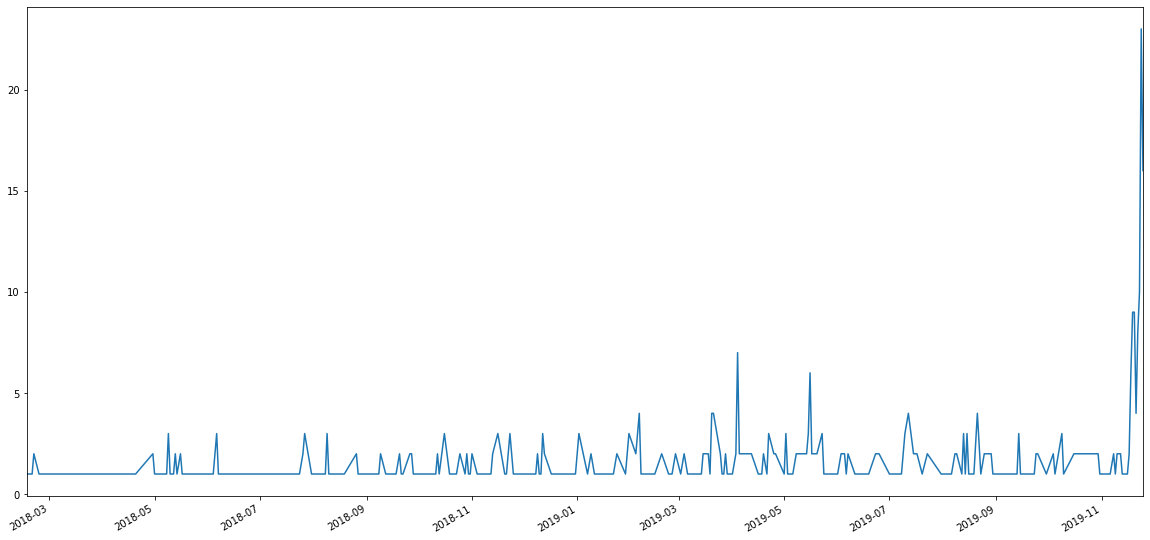

In [28]:
# Se olharmos no grafico 'date', vamos ver no final o número aumenta absurdamente
# o sistema de busca do YT nao retorna exatamente todos os videos publicados nas datas anteriores, ele faz uma seleção mesmo pedindo que seja por ordem de publicação
# entao temos muito mais videos no final do que no começo
# isso que significa que: como aqui preciso fazer uma validação temporal, se eu dividir no meio, nunca vou ver nos meus dados de treino um video com o mesmo numero de dias desde a publicação que eu vou encontrar nos dados de validação e de teste
# vamos dizer que eu divida em 2019-01 minha validação, nos dados de treino vou ter 350-400 dias desde a publicação, nunca encontrarei os mesmos valores nessa feature entre validação e treino
# eliminamos a feature, tempo desde pub, mas views por dia é uma maneira de considerarmos esses fatores, e views por dia consigo ter valores similares entre treino e teste


df_limpo['date'].value_counts().plot(figsize=(20,10))

In [29]:
# gosta de ter 50% de treino e 50% pra validação, cerca disso.
# logo mario separou assim, todos antes de 04-2019 pra treino e depois pra validação
# até agora apenas 2 features
Xtrain, Xval = features[df_limpo['date'] < "2019-04-01"], features[df_limpo['date'] >= "2019-04-01"]
ytrain, yval = y[df_limpo['date'] < "2019-04-01"], y[df_limpo['date'] >= "2019-04-01"]

Xtrain.shape, Xval.shape, ytrain.shape, yval.shape

((228, 2), (270, 2), (228,), (270,))

MAS MARIO PQ ESTÁ FAZENDO MODELO AGORA SENDO QUE NÃO ESTAMOS NA PARTE DA MODELAGEM ?


E ai que entra a parte da arte do data science. Mario ficou curioso pra saber se, tivesse só essas duas features como elas influenciam sua preferencia por videios, como influenciam o que to querendo prever.

Como as features indicam a previsão que eu vou ter, se vou gostar ou nao do video.

Umas das melhores maneiras de entender a relação das features com o alvo é criando uma árvore de decisão. Especialmente quando são poucas features.

In [30]:
# produnidade 2, no maximo dois niveis de nós.
# balanced, pois certamente temos classes desbalanceadas, ao fazer a média do y_treino e multiplicando por 228, temos 32 exemplos positivos de 228 
# balanced trata de forma igual essas duas classes embora nao tenha a mesma quantidade
# ele da um peso maior pra classe positiva, quando tiver calculando a penalidade recebida pelo modelo por cometer erro, ele multiplica por um coef que vai dar mais peso pras penalidades nos exemplo positivos pra simula que a gente tem a mesma quatidade entre treino e validação 
mdl = DecisionTreeClassifier(random_state = 0, max_depth = 2, class_weight = 'balanced')
mdl.fit(Xtrain, ytrain)

DecisionTreeClassifier(class_weight='balanced', criterion='gini', max_depth=2,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=0, splitter='best')

In [31]:
# função predict_proba vai dar pra gente uma array do numpy com duas colunas, uma com a prob de ser 0 e outra de ser 1
# e aqui eu quero ver só a de ser 1
p = mdl.predict_proba(Xval)[:, 1]

In [32]:
# aqui é a hora de escolher as métricas de ML
# como to tratando de ranking, videos mais interessantes acima dos menos, que definimos lá no inicio
from sklearn.metrics import roc_auc_score, average_precision_score

In [33]:
# averagede precision, se calcularmos precision e recall, em cada ponto de corte que podemos escolher pra nossas previsões e criarmos uma curva
# a área acima dessa curva vai ser a average de precision

average_precision_score(yval, p) #baseline

0.14808785529715762

EXPLICAÇÃO DO MARIO PARA AUC

positivos = [0.1, 0.2, 0.3]
negativos = [0.05, 0.15, 0.25]

pos = 0.2, neg = 0.05 > sim, 1, True
pos = 0.1, neg = 0.15 > nao, 0, False

Exemplos positivos, e quais probabilidades o modelo atribuiu a eles de serem de fato positivos
Negativos, que sao negativos e a probabilidades que o modelo atribuiu a eles de serem de fato negativos.

Vamos supor que a gente repetidamente pegasse um exemplo de cada uma das caixinhas, aleatoriamente, no primeiro ali, temos que 0.2 pos tem score maior queo neg, entao true.

No segundo exemplo, o contrario, entao false.

se fizer isso varias vezes, muitas mesmos. Fazer aleatoriamente, a hora que calcular a media dos valores 0 e 1 nessas comprações vc vai chegar em um numero parecido com o que a função do roc retorna.

In [34]:
# se tivermos 
roc_auc_score(yval, p)

0.5705167173252279

Um razao para escolher exploração com a arvore de decisão e pra mostrar a função plot tree que mostra a estrutura da árvore e mostra como tu pode entender essa estrutura.

In [35]:
from sklearn.tree import plot_tree

[Text(279.0, 453.0, 'views <= 15110.0\ngini = 0.5\nsamples = 228\nvalue = [114.0, 114.0]'),
 Text(139.5, 271.8, 'views_por_dia <= 0.699\ngini = 0.481\nsamples = 133\nvalue = [62.235, 92.625]'),
 Text(69.75, 90.59999999999997, 'gini = 0.0\nsamples = 14\nvalue = [8.143, 0.0]'),
 Text(209.25, 90.59999999999997, 'gini = 0.466\nsamples = 119\nvalue = [54.092, 92.625]'),
 Text(418.5, 271.8, 'views <= 26712.0\ngini = 0.414\nsamples = 95\nvalue = [51.765, 21.375]'),
 Text(348.75, 90.59999999999997, 'gini = 0.0\nsamples = 20\nvalue = [11.633, 0.0]'),
 Text(488.25, 90.59999999999997, 'gini = 0.453\nsamples = 75\nvalue = [40.133, 21.375]')]

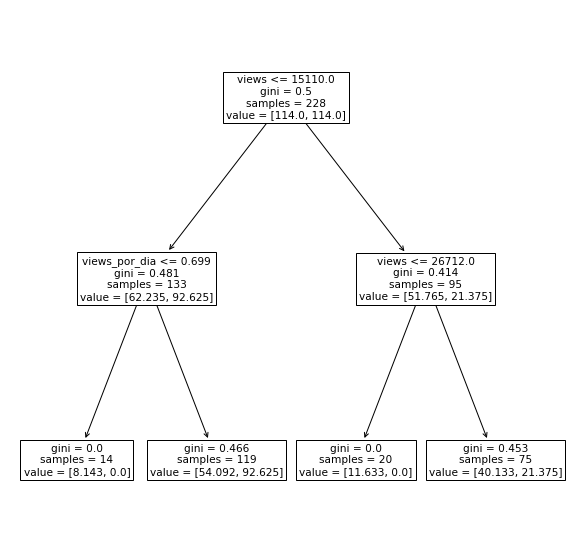

In [36]:
fig, ax = pylab.subplots(1,1, figsize=(10,10))
plot_tree(mdl, ax=ax, feature_names=Xtrain.columns)

##### Nao e uma coisa que mario faz em todo projeto mas quis mostrar que existe a possibilidade de se visualizar árvore

Chegamos na parte onde visualizamos a decision tree!

Vamos interpretar o grafico e tirar insight, entender melhor como que as features se relacionam com o alvo.



Como que a gente interpreta ?
Vemos uns padrões interessantes, com as colunas do X de treino, que são as features, no caso deixamos só duas, o lado esquerdo é o lado verdadeiro, ou seja, o lado dos exemplos que correspondem a condição que está colocada.

Por exemplo, no primeiro né temos views <= 15110.0, se for verdadeiro, vai pra esquerda. Colocamos que as árvores teriam no maximo dois niveis de profundidade.

Caimos no segundo nó, views_por_dia, <= 0.699, ou seja, ele teve menos de uma view por dia, desde que foi postado, em média menos de 1 view por dia.

Indo pela esquerda, supondo que é verdadeiro, caimos em um nó puro, as 14 amostras são exemplos negativos, se um video tem menos de 15 mil views e nao acumulou muitas views por dia, provavelmente eu nao vou gostar.

No nó ráiz, vemos que o value ta [114,144], como colocamos pra ser balanceado, ele ta colocando como se os exemplos tivessem o mesmo peso, 50% de cada classe, é o peso dos exemplos e não a quantidade.

Caindo no nó com videos com mais de 15 mil views, pra direita, podemos considerar popular, agora se for popular, mas nao pra ter mais de 26mil, caimos pra esquerda, no terceiro nó da esquerda pra direita, que é outro nó puro, com todas as 26 amostras negativas.

Outro nó, o segundo da esquerda pra direita, os videos que tem menos de 15mil views mas mais de 1 view por dia, tem mais chance de eu gostar, e ai o score séra: 92/(92+54) e nos dá um score maior de ser um video que eu gosto.

Árvore de profundidade 2 é muito pequena, poder de modelagem baixo e tbm so temos 2 features, mas só queriamos ver em termos de visualização o que esse modelo conseguia encontrar. Então entendi que tem videos bem impopulares que geralmente nao vou gostar, e que videos mais populares, tem uma parcela que pode ser que eu nao goste.

Olhando o quarto nó final, que sao os videos com acima de 26 mil views, e vemos que esses muito populares, sao videos que normalmente nao gosto, podem cair videos que tem muitas views pq estao na lingua da india, e como tem muitas pessoas la acaba tendo muitas views, e nao é interessante pra nós.


NÃO É ESSENCIAL MAS MARIO QUIS MOSTRAR ESSE RECURSO. QUANTO MAIS PROFUNDA A ÁRVORE, MAIS DIFICIL DE ANALISAR.